## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [6]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [7]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [8]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
num_rows = len(gdp_df)
print(num_rows)

8219


In [10]:
num_columns = len(gdp_df.columns)
print(num_columns)

4


In [11]:
rows, cols = gdp_df.shape
print(rows, cols)
print(f"Rows: {rows}, Columns: {cols}")

8219 4
Rows: 8219, Columns: 4


In [12]:
print(gdp_df.shape)

(8219, 4)


In [13]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [14]:
gdp_df_drop = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df_final = gdp_df_drop.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df_final.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7a. How many countries have data for all years?

In [15]:
country_group = gdp_df_final.groupby('Country').count()
all_country_group = country_group[country_group['Year'] == 34].count()
print(all_country_group)

Year              228
GDP_Per_Capita    228
dtype: int64


7b. Which countries are missing many years of data?

In [16]:
country_group = gdp_df_final.groupby('Country').count()
filtered_country_group = country_group[country_group['Year'] < 34]
filtered_country_group = filtered_country_group.rename(columns={'Year': 'Years of Data', 'GDP_Per_Capita': 'Missing No. of Years'})
filtered_country_group["Missing No. of Years"] = 34 - filtered_country_group["Missing No. of Years"]
sorted_filtered_country_group = filtered_country_group.sort_values(by=['Missing No. of Years'], ascending = False)
display(sorted_filtered_country_group)

,Years of Data,Missing No. of Years
Country,,
Djibouti,11,23
Turks and Caicos Islands,13,21
Sint Maarten (Dutch part),15,19
Faroe Islands,16,18
Kosovo,16,18
Cayman Islands,18,16
Virgin Islands,21,13
Afghanistan,24,10
CuraÃ§ao,24,10


7c. Look at the number of observations per year. What do you notice?

A: The number of observations increases each year until plateauing at 247 from 2013-2021 before declining. There are also only 195 countries in the world, so the number of observations exceeds the total number of countries - discovered that they also track regions with qualifiers.

In [17]:
year_group = gdp_df_final.groupby('Year').count()
year_group = year_group.rename(columns={'Country': 'No. of Observations'})
year_group = year_group.drop('GDP_Per_Capita', axis = 1)
display(year_group)

,No. of Observations
Year,
1990,233
1991,234
1992,234
1993,234
1994,235
1995,236
1996,236
1997,238
1998,238


In [18]:
country_group_list = gdp_df_final['Country'].unique()
print(country_group_list)

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua and Barbuda' 'Arab World'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' "CÃ´te d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Caribbean small states'
 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'CuraÃ§ao' 'Cyprus' 'Czechia'
 'Dem. Rep. Congo' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Euro area'
 'Europe & Centr

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [19]:
gdp_2020 = gdp_df_final[gdp_df_final['Year'] == 2020].sort_values(by=["GDP_Per_Capita"], ascending=True)
gdp_2020.head()

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


Text(0.5, 1.0, 'Histogram of GDP Per Capita in 2020')

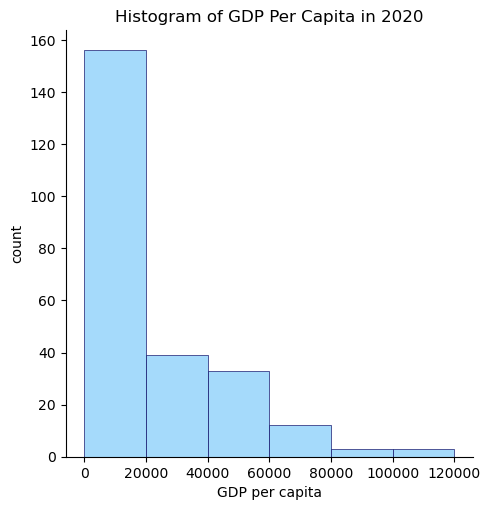

In [20]:
##histogram with seaborn

sns.color_palette('bright')
sns.displot(data=gdp_2020, 
            x='GDP_Per_Capita', 
            edgecolor='MidnightBlue',
            linewidth=0.5,
            color="LightSkyBlue",
            bins = np.arange(start = 0, stop = 140000, step = 20000))
plt.xlabel('GDP per capita')                            
plt.ylabel('count')
plt.title('Histogram of GDP Per Capita in 2020')

Text(0.5, 1.0, 'Histogram of GDP Per Capita in 2020')

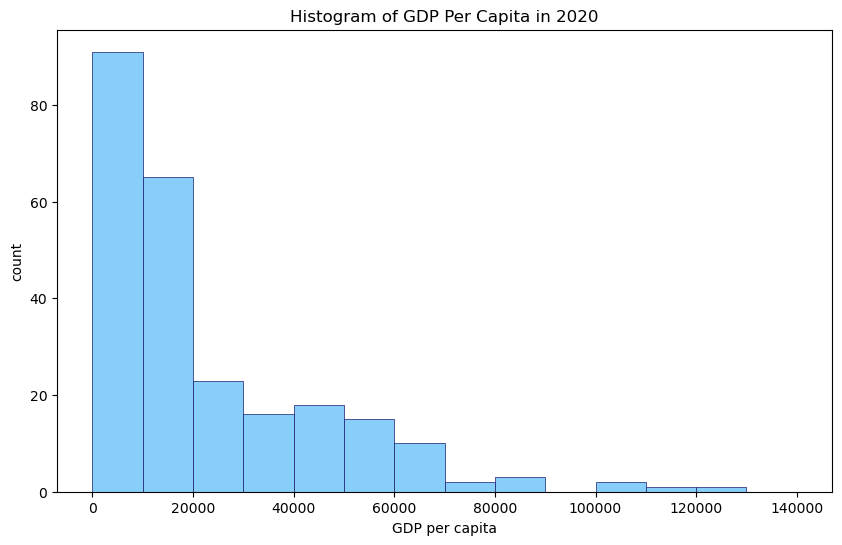

In [21]:
##histogram with matplotlib

fig,ax = plt.subplots(figsize = (10,6))     

plt.hist(
    data=gdp_2020,
    x='GDP_Per_Capita',
    edgecolor='MidnightBlue',
    linewidth=0.5,
    color='LightSkyBlue',
    bins = np.arange(start = 0, stop = 150000, step = 10000)
);                              
plt.xlabel('GDP per capita')                            
plt.ylabel('count')
plt.title('Histogram of GDP Per Capita in 2020')

Text(0.5, 1.0, 'Density Plot of GDP Per Capita in 2020')

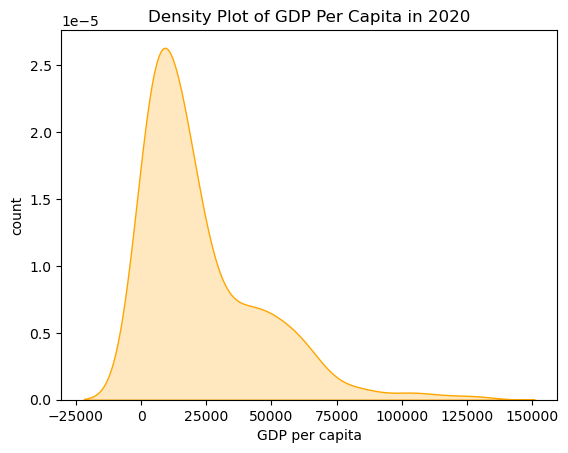

In [22]:
sns.kdeplot(data=gdp_2020['GDP_Per_Capita'], fill=True, color = 'orange')
plt.xlabel('GDP per capita')                            
plt.ylabel('count')
plt.title('Density Plot of GDP Per Capita in 2020')

Text(0.5, 1.0, 'Box Plot of GDP Per Capita in 2020')

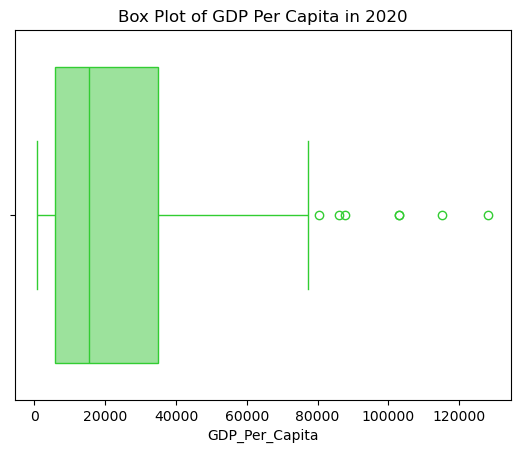

In [23]:
##boxplot with seaborn

sns.boxplot(x=gdp_2020["GDP_Per_Capita"], color="LightGreen", linecolor="LimeGreen")
plt.title('Box Plot of GDP Per Capita in 2020')

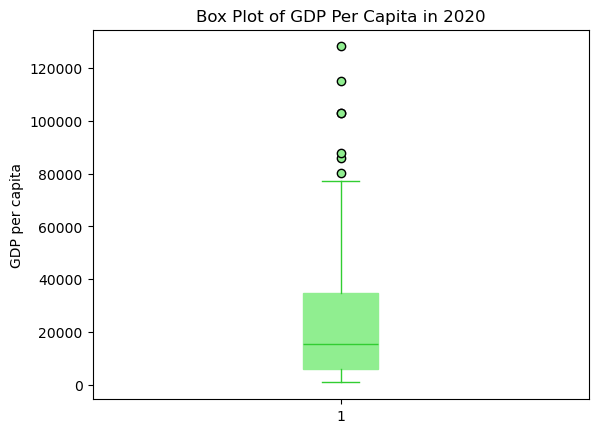

In [24]:
##boxplot with matplotlib

fig, ax = plt.subplots()
gdp_boxplot = plt.boxplot(gdp_2020['GDP_Per_Capita'], patch_artist=True)
plt.ylabel('GDP per capita')    
plt.title('Box Plot of GDP Per Capita in 2020')
plt.setp(gdp_boxplot['boxes'], color="LightGreen")
plt.setp(gdp_boxplot['whiskers'], color="LimeGreen")
plt.setp(gdp_boxplot['caps'], color="LimeGreen")
plt.setp(gdp_boxplot['fliers'], markerfacecolor="LightGreen")
plt.setp(gdp_boxplot['medians'], color="LimeGreen")
plt.show()

<Axes: xlabel='GDP_Per_Capita'>

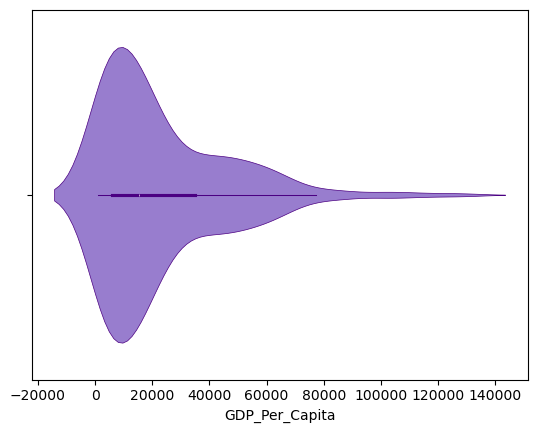

In [25]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"], color="MediumPurple", edgecolor='Indigo', linewidth=0.5)

9. What was the median GDP per capita value in 2020?

In [26]:
gdp_2020["GDP_Per_Capita"].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [27]:
gdp_1990 = gdp_df_final[gdp_df_final['Year'] == 1990]
gdp_2000 = gdp_df_final[gdp_df_final['Year'] == 2000]
gdp_2010 = gdp_df_final[gdp_df_final['Year'] == 2010]
gdp_2020 = gdp_df_final[gdp_df_final['Year'] == 2020]
gdp_decades = pd.concat([gdp_1990, gdp_2000, gdp_2010, gdp_2020], ignore_index=True)
print(gdp_decades)

                         Country  Year  GDP_Per_Capita
0    Africa Eastern and Southern  1990     3386.854480
1     Africa Western and Central  1990     3299.401375
2                        Albania  1990     5327.747458
3                        Algeria  1990    11728.545729
4                        Andorra  1990    50036.300776
..                           ...   ...             ...
960               Virgin Islands  2020    45055.782930
961           West Bank and Gaza  2020     5423.682547
962                        World  2020    18600.986362
963                       Zambia  2020     3391.595412
964                     Zimbabwe  2020     2987.269823

[965 rows x 3 columns]


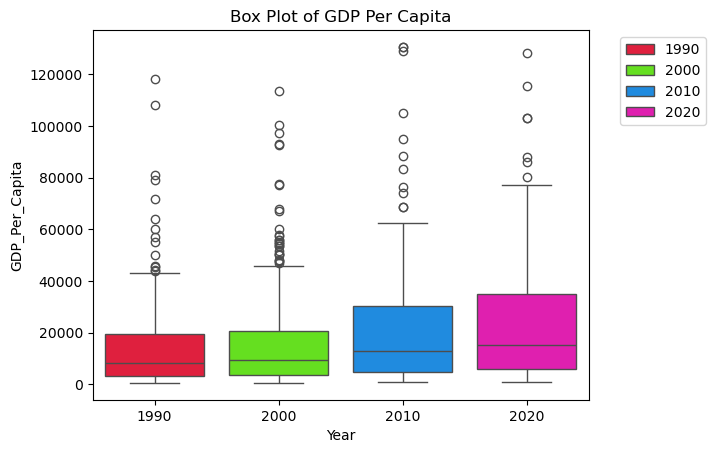

In [28]:
sns.boxplot(x='Year', y='GDP_Per_Capita', hue='Year', data=gdp_decades, palette='gist_rainbow')
plt.title('Box Plot of GDP Per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

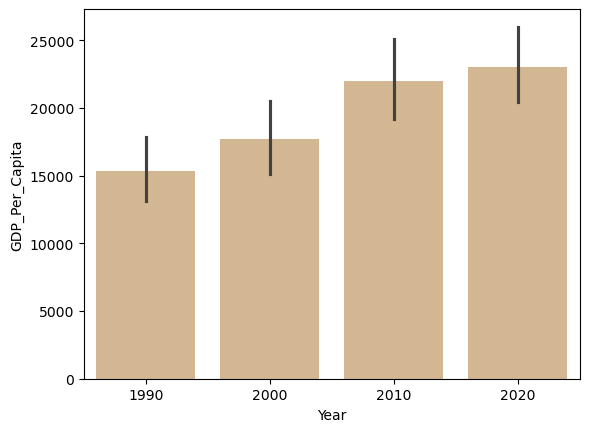

In [29]:
bar1 = sns.barplot(x="Year",  y="GDP_Per_Capita", data=gdp_decades, color='burlywood')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

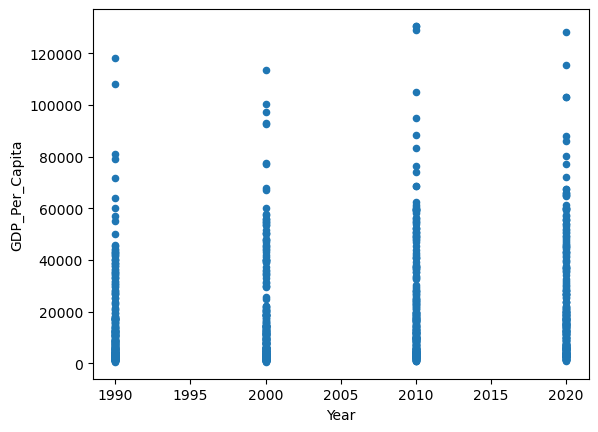

In [30]:
gdp_decades.plot.scatter(x='Year', y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

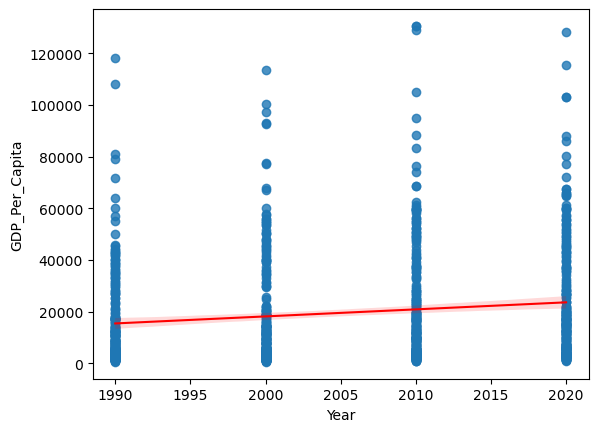

In [31]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={"color": "red", "linewidth": 1.5})

11. Which country was the first to have a GDP per capita greater than $100,000?

A: United Arab Emirates in 1990 with $108,057

In [32]:
gdp_sorted = gdp_df_final.sort_values(by=["Year"], ascending=True)
gdp_sorted_min = gdp_sorted[gdp_sorted['GDP_Per_Capita'] > 100000]
print(gdp_sorted_min)

                   Country  Year  GDP_Per_Capita
974                 Brunei  1990   118163.683198
7827  United Arab Emirates  1990   108057.042464
973                 Brunei  1991   118220.683619
7826  United Arab Emirates  1991   103098.537132
7825  United Arab Emirates  1992   101100.487512
...                    ...   ...             ...
6511             Singapore  2023   127543.554752
4423            Luxembourg  2023   130373.477942
4457      Macao SAR, China  2023   104961.643485
6116                 Qatar  2023   116159.142559
3490               Ireland  2023   115401.125283

[106 rows x 3 columns]


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

A. Luxembourg with $128.256.56

In [33]:
gdp_max_2020 = gdp_df_final[gdp_df_final['Year'] == 2020].sort_values(by=["GDP_Per_Capita"], ascending=False)
print(gdp_max_2020.head(1))

         Country  Year  GDP_Per_Capita
4426  Luxembourg  2020   128256.560341


Text(0.5, 1.0, 'Luxembourg GDP per capita Over Time')

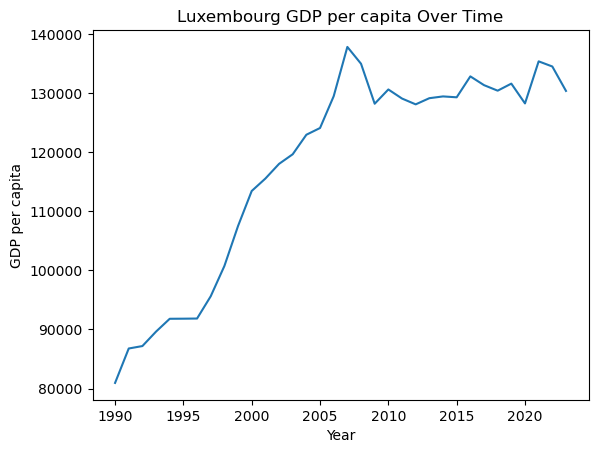

In [34]:
gdp_Lux = gdp_df_final[gdp_df_final["Country"] == "Luxembourg"]
plt.plot( 'Year', 'GDP_Per_Capita', data=gdp_Lux)
plt.xlabel('Year')                            
plt.ylabel('GDP per capita')
plt.title('Luxembourg GDP per capita Over Time')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [35]:
gdp_min_2020 = gdp_df_final[gdp_df_final['Year'] == 2020].sort_values(by=["GDP_Per_Capita"], ascending=True)
print(gdp_min_2020.head(1))

      Country  Year  GDP_Per_Capita
1046  Burundi  2020      833.920257


Text(0.5, 1.0, 'Burundi GDP per capita Over Time')

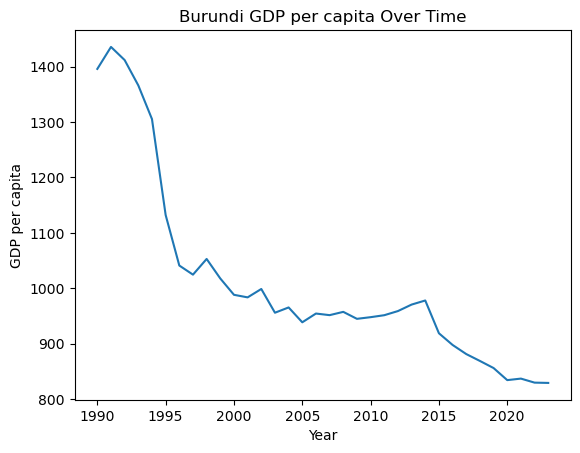

In [36]:
gdp_Lux = gdp_df_final[gdp_df_final["Country"] == "Burundi"]
plt.plot( 'Year', 'GDP_Per_Capita', data=gdp_Lux)
plt.xlabel('Year')                            
plt.ylabel('GDP per capita')
plt.title('Burundi GDP per capita Over Time')

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

A: In general, yes. 24 countries and regions had a lower GDP per capita in 2020 than in 1990.

In [37]:
gdp_1990_list = gdp_df_final[gdp_df_final['Year'] == 1990].sort_values(by=["Country"], ascending=True)
gdp_2020_list = gdp_df_final[gdp_df_final['Year'] == 2020].sort_values(by=["Country"], ascending=True)
gdp_merge = pd.merge(gdp_1990_list, gdp_2020_list, on="Country", how='left')
gdp_merge["GDP_difference"] = gdp_merge["GDP_Per_Capita_y"] - gdp_merge["GDP_Per_Capita_x"]
gdp_merge_neg = gdp_merge[gdp_merge['GDP_difference'] < 0]
print(gdp_merge_neg)

                                      Country  Year_x  GDP_Per_Capita_x  \
10                                      Aruba    1990      34579.220640   
16                                   Barbados    1990      16976.761648   
27                                     Brunei    1990     118163.683198   
30                                    Burundi    1990       1396.077627   
36                   Central African Republic    1990       1481.252551   
43                                      Congo    1990       8699.526839   
49                            Dem. Rep. Congo    1990       2172.001597   
71   Fragile and conflict affected situations    1990       6062.707946   
73                                      Gabon    1990      23884.810700   
84                                      Haiti    1990       3946.365646   
111                           Kyrgyz Republic    1990       6095.681086   
121                                   Liberia    1990       1866.405481   
122                      

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [38]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [39]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [40]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [41]:
internet_df_drop = internet_df.drop('Value Footnotes', axis = 1)
internet_df_final = internet_df_drop.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
internet_df_final.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

A: 1990 appears to be a baseline data point with observation numbers of internet use for all countries. Then beginning in 1991 internet use grows through 2002 and remains relatively stable until 2018 before declining below 200 for the remaining years.

In [42]:
internet_year_group = internet_df_final.groupby('Year').count()
display(internet_year_group)

,Country,Internet_Users_Pct
Year,,
1990,226,226
1991,39,39
1992,50,50
1993,66,66
1994,92,92
1995,141,141
1996,177,177
1997,188,188
1998,195,195


17. What is the first year to have a non-zero internet users percentage value?

A: 1990

In [43]:
internet_nonzero = internet_df_final[internet_df_final["Internet_Users_Pct"] != 0].sort_values(by=["Year"], ascending=True)
print(internet_nonzero)

                     Country  Year  Internet_Users_Pct
1570                 Denmark  1990            0.097277
2892                   Japan  1990            0.020294
306                Australia  1990            0.585095
2034                  France  1990            0.052778
339                  Austria  1990            0.130369
...                      ...   ...                 ...
427               Bangladesh  2023           44.502700
677   Bosnia and Herzegovina  2023           83.377200
1656                 Ecuador  2023           72.694300
1537                 Denmark  2023           98.775600
3057                  Kuwait  2023           99.747300

[5803 rows x 3 columns]


18. How does the distribution of internet users percent differ for 2000 and 2014?

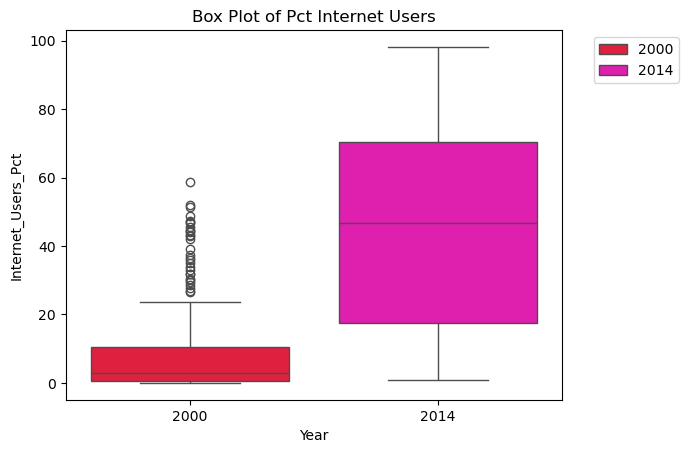

In [44]:
internet_2000 = internet_df_final[internet_df_final['Year'] == 2000]
internet_2014 = internet_df_final[internet_df_final['Year'] == 2014]
internet_2000_2014 = pd.concat([internet_2000, internet_2014], ignore_index=True)
sns.boxplot(x='Year', y='Internet_Users_Pct', hue='Year', data=internet_2000_2014, palette='gist_rainbow')
plt.title('Box Plot of Pct Internet Users')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

19. For how many countries was the percentage of internet users below 5% in 2014?

 A: 10

In [45]:
internet_5per = internet_df_final[(internet_df_final["Internet_Users_Pct"] < 5) & (internet_df_final["Year"] == 2014)]
print(internet_5per)

                               Country  Year  Internet_Users_Pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [46]:
gdp_and_internet_use = pd.merge(gdp_df_final, internet_df_final, how='outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [47]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,26.5883
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

A: Iceland, Falkland (Malvinas) Islands, Bermuda / Iceland's GDP per capita has steadily increased, Bermuda's increased and then declined - although it appears it's stabilized, and there is no data for the Falkland Islands - maybe because it's a British territory?

In [48]:
gdp_and_internet_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values(by=['Internet_Users_Pct'], ascending=False)
print(gdp_and_internet_2014.head(3))

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448              98.158
2867  Falkland (Malvinas) Islands  2014             NaN              97.600
824                       Bermuda  2014    92298.387811              96.800


In [49]:
gdp_internet_top3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland","Falkland (Malvinas) Islands", "Bermuda"])]
print(gdp_internet_top3)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
800   Bermuda  1990    79109.890650              0.0000
801   Bermuda  1991    75754.494259                 NaN
802   Bermuda  1992    75160.932166                 NaN
803   Bermuda  1993    76883.813796                 NaN
804   Bermuda  1994    76850.912239                 NaN
...       ...   ...             ...                 ...
3949  Iceland  2019    65065.905682             99.5049
3950  Iceland  2020    59575.190393             99.5328
3951  Iceland  2021    61685.835611             99.6870
3952  Iceland  2022    65563.920870             99.8565
3953  Iceland  2023    66880.065810                 NaN

[91 rows x 4 columns]


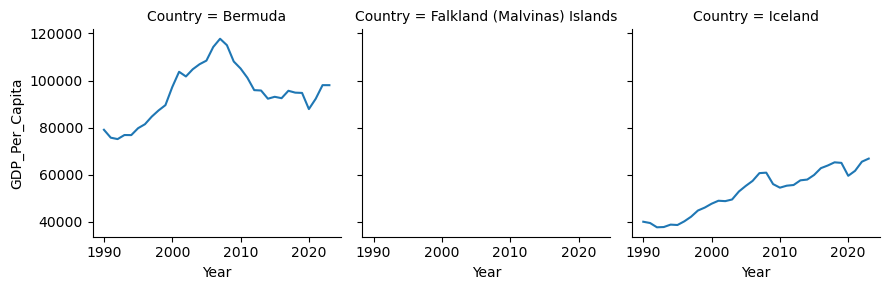

In [50]:
grid = sns.FacetGrid(gdp_internet_top3, col="Country")
grid.map(plt.plot, "Year", "GDP_Per_Capita")
plt.show()

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [51]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN
83,Africa Western and Central,2014,4816.917355,NaN
117,Albania,2014,12788.747231,54.3
151,Algeria,2014,15073.762940,29.5


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

A: strong positive curvilinear correlation with only a small handful of outliers

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

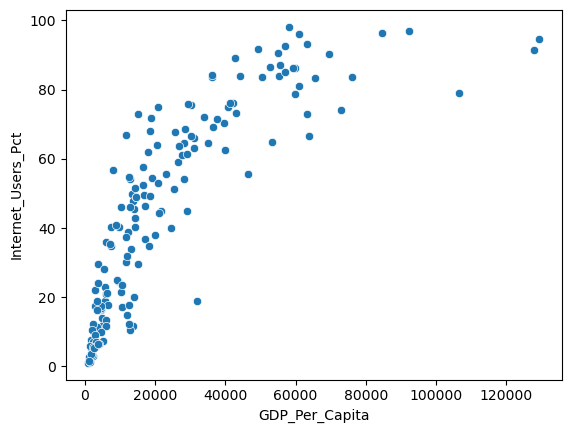

In [52]:
sns.scatterplot(x=gdp_and_internet_use_2014["GDP_Per_Capita"], y=gdp_and_internet_use_2014["Internet_Users_Pct"])

In [53]:
outliers1 = gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita'] > 100000]
print(outliers1)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
5200        Luxembourg  2014   129443.183641             94.6702
5234  Macao SAR, China  2014   162582.374111                 NaN
7045             Qatar  2014   128013.987046             91.4900
7566         Singapore  2014   106604.492771             79.0292


exploration note - A little surprised Singapore's internet use pct is that low, not surprised at which countries have the highest GDP per capita

In [54]:
outliers2 = gdp_and_internet_use_2014[(gdp_and_internet_use_2014['GDP_Per_Capita'] > 20000) & (gdp_and_internet_use_2014['Internet_Users_Pct'] < 30)]
print(outliers2)

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
2538  Equatorial Guinea  2014    31765.899706               18.86


In [55]:
us_data = gdp_and_internet_use_2014[gdp_and_internet_use_2014['Country'] == "United States"]
us_data.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9069,United States,2014,63191.247781,73.0


exploration note - US looks to be a little under the curve

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [56]:
gdp_and_internet_use_2014.loc[:,"GDP_group"] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels=["Low", "Medium", "High"])
gdp_and_internet_use_2014.head()

C:\Users\amand\AppData\Local\Temp\ipykernel_11948\1631602454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014.loc[:,"GDP_group"] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels=["Low", "Medium", "High"])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
15,Afghanistan,2014,3017.942544,7.0,Low
49,Africa Eastern and Southern,2014,4052.851526,NaN,Low
83,Africa Western and Central,2014,4816.917355,NaN,Low
117,Albania,2014,12788.747231,54.3,Medium
151,Algeria,2014,15073.762940,29.5,Medium


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [58]:
GDP_low = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_group"] == "Low"]
GDP_low["Internet_Users_Pct"].median()

11.600000000000001

In [59]:
GDP_medium = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_group"] == "Medium"]
GDP_medium["Internet_Users_Pct"].median()

44.5945

In [60]:
GDP_high = gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_group"] == "High"]
GDP_high["Internet_Users_Pct"].median()

75.97999999999999